## Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

In [155]:
# Read in the Metro_Interstate_Traffic_Volume.csv file using Pandas.
import pandas as pd

i_94=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [156]:
# Examine the first and the last five rows.

i_94.head()
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [157]:
# Use DataFrame.info() to find more information about the dataset.

i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


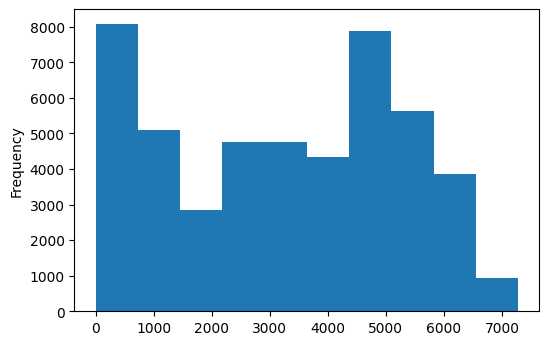

In [158]:
# Add the %matplotlib inline magic.

%matplotlib inline

# Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.

i_94['traffic_volume'].plot.hist()

In [159]:
# Use Series.describe() to look up a few statistics about the traffic_volume column.

i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [160]:
# Note a few observations about the distribution of traffic_volume based on the histogram and the result of Series.describe().

# About 30% of the frequency of the traffic volume ranges between 0 to 1500
# The average traffic volume on the I-94 interstate is 3300
# The maximum traffic volume on the I-94 interstate is 7300
# The histogram plot shows right skewness in the range 0 to 2500
# In between range 2500 to 4500, the histogram exhibits symmetric distribution
# In between range 4500 to 7500, the histogram again shows right skewness


In [161]:
# Do you think daytime and nighttime influence the traffic volume?

# Day time traffic flows between 6 hrs to 18 hrs
# Night time traffic flows between 18 hrs to 6 hrs

# Transform the date_time column to datetime by using the function pd.to_datetime().

i_94['date_time']=pd.to_datetime(i_94['date_time'])

# Use the Series.dt.hour property to get the hour of every instance of the date_time column and do the following:


# Isolate the daytime data.

day=i_94.copy()[(i_94['date_time'].dt.hour>=6) & (i_94['date_time'].dt.hour<18)]
print(day.shape)

# Isolate the nighttime data.

night=i_94.copy()[(i_94['date_time'].dt.hour>=18) | (i_94['date_time'].dt.hour<6)]
print(night.shape)

# There is evidence that the night time traffic volume is 24226
# The day time traffic volume 23978
# THere is missing data for hours 16 and 17 indicating lesser daytime counts 

(23978, 9)
(24226, 9)


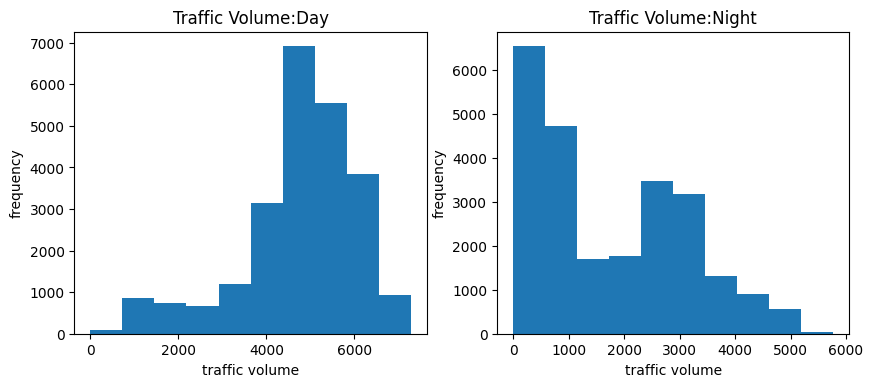

In [162]:
import matplotlib.pyplot as plt

# Plot the histograms of traffic_volume for both day and night. Organize the two histograms side-by-side on a grid chart.

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume:Day')
plt.xlabel('traffic volume')
plt.ylabel('frequency')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume:Night')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.show()

In [163]:
# Use Series.describe() to look up a few statistics for traffic_volume for both day and night.

day['traffic_volume'].describe()

count    23978.000000
mean      4749.223997
std       1314.402414
min          1.000000
25%       4269.000000
50%       4923.000000
75%       5660.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [164]:
night['traffic_volume'].describe()

count    24226.000000
mean      1785.659663
std       1332.692347
min          0.000000
25%        530.000000
50%       1414.000000
75%       2880.000000
max       5773.000000
Name: traffic_volume, dtype: float64

In [165]:
# Analyze the results:
# What shape do the histograms have and what does that indicate?
# The histogram displaying the daytime data is left skewed.
# Left skewed means most of the time the traffic volume is heavy
# The histogram displaying the nighttime data is right skewed.
# Right skewed means most of the time the traffic volume is light

# If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

# Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light.
# Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [166]:
# Copy the code above and run it into your notebook to get the monthly traffic volume averages.

day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4490.871514
2     4703.425703
3     4846.036579
4     4904.094157
5     4909.814747
6     4880.185497
7     4576.383174
8     4922.207401
9     4864.298715
10    4915.572576
11    4699.705461
12    4344.758589
Name: traffic_volume, dtype: float64

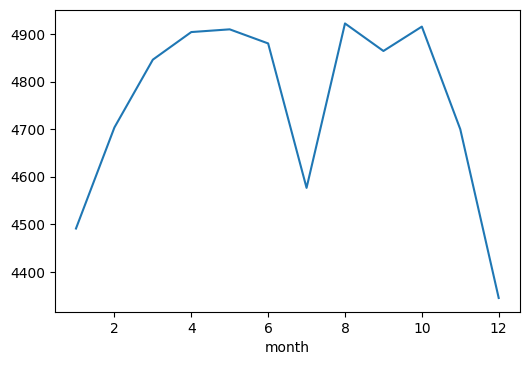

In [167]:
# Generate a line plot to visualize how the traffic volume changed each month on average.

by_month['traffic_volume'].plot.line()
plt.show()

In [168]:
# Analyze the line plot. Do you notice any interesting exception?

# The graph indicates peak traffic intensity for months August and October
# The graph shows logarithmic pattern for months January to June
# There is a decline in the volume for the month July followed by a sharp incline for August
# After the month of October, the graph shows a steep decline before plateuing in December
# This goes to show that during months of July and December, the volume plummets due to Summer and Winter holidays.

In [169]:
# Generate a line plot to visualize how the traffic volume changed each day of the week on average.

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4982.069083
1    5277.989340
2    5371.518100
3    5391.899053
4    5339.223762
5    3698.476806
6    3193.927035
Name: traffic_volume, dtype: float64

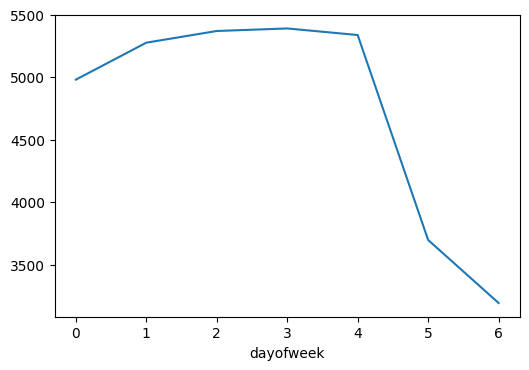

In [170]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

In [171]:
# Analyze the line plot. Do you notice any difference between business days and the weekend?

# The line shows traffic volume in the range of 5000 to 5500 for weekdays, Monday to Friday
# There is a decline in traffic volume in the range of 3100 to 3700 for weekends, Saturday and Sunday

In [172]:
# Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.
# One plot shows how traffic volume changes during business days and the other shows how it changes during weekends.
# Add a title to each graph.
# Bring both graphs to the same x- and y-axis range.

day['hour'] = day['date_time'].dt.hour
weekday=day.copy()[day['dayofweek']<=4]
weekend=day.copy()[day['dayofweek']>=5]
by_hour_weekday=weekday.groupby('hour')['traffic_volume'].mean()
by_hour_weekend=weekend.groupby('hour')['traffic_volume'].mean()

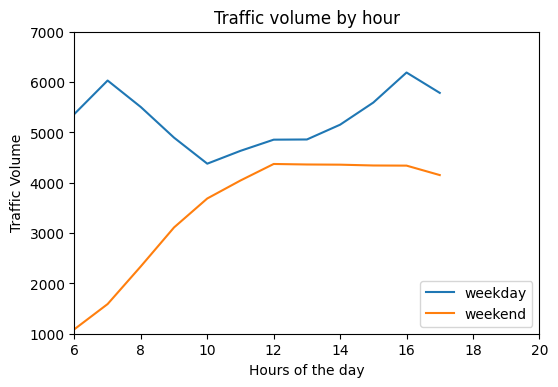

In [173]:
plt.plot(by_hour_weekday,label='weekday')
plt.plot(by_hour_weekend,label='weekend')
plt.xlim(6,20)
plt.ylim(1000,7000)
plt.title('Traffic volume by hour')
plt.xlabel('Hours of the day')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [174]:
# Analyze both charts. How do they compare? When are the rush hours on business days?

# The traffic volume during weekdays is more than that of weekends
# The peak traffic during weekdays is at 07:00 hrs and at 16:00 hrs
# During both these times the traffic volume reaches above 6000

In [175]:
# Summarize all your findings regarding time indicators for heavy traffic.

# As stated above the peak traffic timings for weekdays are 7 AM and 4 PM
# The peaks can be attributed to the office rush hour 
# Weekend traffic volume is lesser than weekdays
# Weekend curve shows a logarithmic increase from 6 to 12 hrs and remains steady from 12 to 18 hrs
# The steadiness of the weekend curve from 12 to 18 hrs is because of afternoon weekend outings

In [176]:
# Find the correlation values between traffic_volume and the numerical weather columns

day.corr()['traffic_volume']

temp              0.131734
rain_1h           0.003192
snow_1h           0.001751
clouds_all       -0.017816
traffic_volume    1.000000
month            -0.020676
dayofweek        -0.464383
hour              0.278076
Name: traffic_volume, dtype: float64

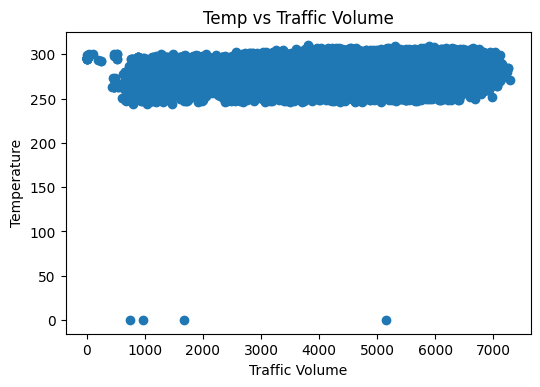

In [177]:
# Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.

plt.scatter(day['traffic_volume'],day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.title('Temp vs Traffic Volume')
plt.show()

The numerical weather columns rain_1h, snow_1h and clouds_all have either a negative correlation or a weak positive correlation of less than 5%

The numerical weather column with a positive correlation of 13% is the temperature

This is not a good indicator of traffic

The other weather columns are categorical in nature and are weather_main and weather_description

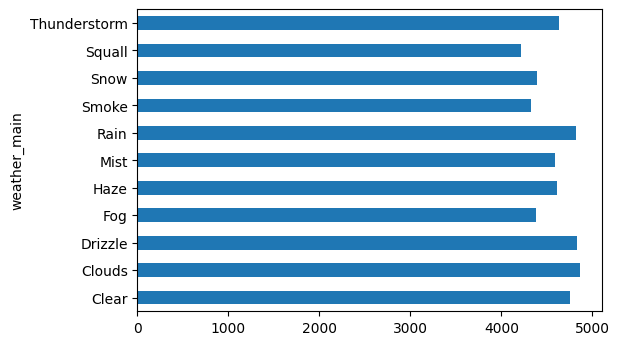

In [178]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_main

day.groupby('weather_main')['traffic_volume'].mean().plot.barh()
plt.show()

In [179]:
# Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?

# There is no eeather column exceeding 5000 cars 
# There is maximum traffic inflow when the weather is cloudy
# There is least traffic inflow when there is squall

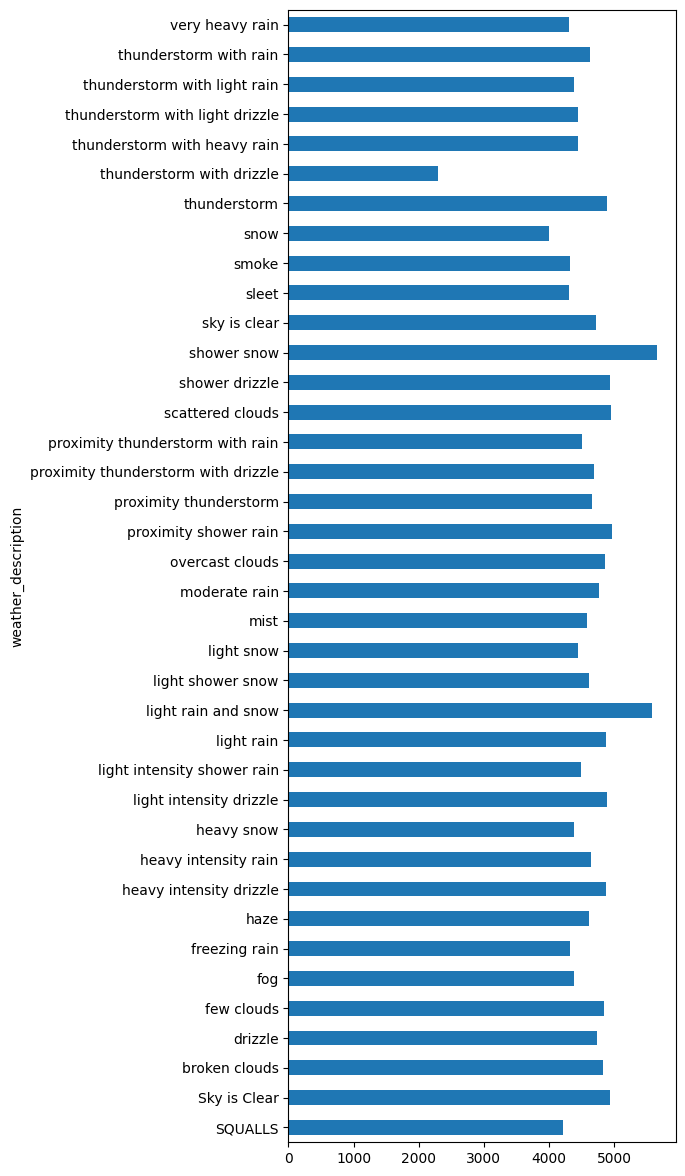

In [180]:
# Plot a horizontal bar plot for the traffic_volume column of by_weather_description. This column has many unique values, so you'll need to enlarge the figure size to make it readable. You can use plt.figure(figsize=(width,height)) or Series.plot.barh(figsize=(width,height)).

day.groupby('weather_description')['traffic_volume'].mean().plot.barh(figsize=(5,15))
plt.show()

In [181]:
# Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?

# The traffic volume exceeds 5000 when there is shower snow and light rain and snow

In [1]:
# Write up your conclusions for the entire project — this was the last step.

# There are two indicators of heavy traffic which are time and weather
# Traffic is heavier during the weekdays compared to weekends
# Traffic is highest in the months of August and October compared to December and February
# Traffic is highest during 7 hrs and 16 hrs during weekThe traffic volume exceeds 5000 when there is shower snow and light rain and snowdays due to office rush
# The traffic volume exceeds 5000 when there is shower snow and light rain and snow